In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [11]:
sample_set = pd.read_csv('train.csv')
final_set = pd.read_csv('test.csv')
final = final_set.drop("SalePrice", axis=1)
mean = sample_set.mean()
std = final_set.std()

# 
sample = (sample_set - mean) / std
final = (final - mean.drop("SalePrice")) / std.drop("SalePrice")

In [12]:
# Initilise the  variables and lists
m = np.zeros(len(sample.columns)-1) # M-gradient
b = 0 # B-gradient
L = 0.0001 # Learning Rate
cmse = 0
epochs = 1100 # epochs is used to se no. of iterations and reduce the error rate
msefunc = [0 for x in range(epochs)] # initialised list to store MSE values over different epochs

# Plotting of Gradient Descent function
def gradient_descent(m_now, b_now, points, L):
  m_gradient = np.zeros(len(m_now))
  b_gradient = 0
  mse = 0
  cmse = 0
  n = len(points)

  for i in range(n):
    x = points.iloc[i][: -1].values
    y = points.iloc[i].SalePrice
    y_pred = np.dot(m_now,x) + b_now
    mse += (y_pred - y) ** 2
    cmse = (mse * std.SalePrice + mean.SalePrice)
    m_gradient += (-(2/n)) * x * (y - (m_now * x + b_now))
    b_gradient += (-(2/n)) * (y - (m_now * x + b_now))
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  cmse /= n
  temp=pd.Series(cmse)
  return m, b, temp[0]
    

In [13]:
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, sample, L)
    msefunc[i] = cmse 

Epoch: 0
MSE: 0
Epoch: 50
MSE: 76445.03870790114
Epoch: 100
MSE: 70988.08467293023
Epoch: 150
MSE: 65871.52647517354
Epoch: 200
MSE: 61086.54383453264
Epoch: 250
MSE: 56624.50916368289
Epoch: 300
MSE: 52476.98360344842
Epoch: 350
MSE: 48635.713137868275
Epoch: 400
MSE: 45092.62478736644
Epoch: 450
MSE: 41839.82287846684
Epoch: 500
MSE: 38869.585388528445
Epoch: 550
MSE: 36174.36036400307
Epoch: 600
MSE: 33746.762410750816
Epoch: 650
MSE: 31579.569254976555
Epoch: 700
MSE: 29665.718373377073
Epoch: 750
MSE: 27998.303691121386
Epoch: 800
MSE: 26570.57234630944
Epoch: 850
MSE: 25375.921519583968
Epoch: 900
MSE: 24407.895327596474
Epoch: 950
MSE: 23660.181779052557
Epoch: 1000
MSE: 23126.609792090036
Epoch: 1050
MSE: 22801.146271764654


In [14]:
print (f"M-gradient (theta): {m}")
print (f"B-gradient: {b}")

M-gradient (theta): [0.15082436 0.14188304 0.12657372 0.12744791 0.13035427 0.12407515
 0.10753495 0.09782827 0.10893167 0.10188999]
B-gradient: [ 2.91763761e-17  3.21419181e-17  3.14334750e-17  3.35934622e-17
  3.04597740e-17  3.57092096e-17  3.29903693e-17  3.26292916e-17
  1.88515239e-17 -2.52131293e-17]


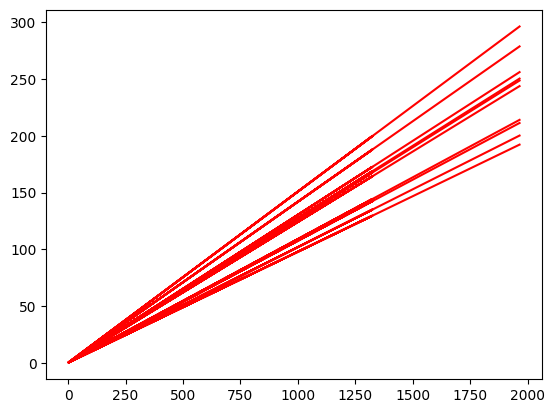

In [15]:
plt.plot (sample_set.iloc[i][: -1].values, [np.dot(m, x) + b for x in sample_set.iloc[i][: -1].values], color="red")
plt.show()

In [16]:
prediction = [np.dot(m,x) + b for x in final_set.drop("SalePrice", axis=1).values]
final_set['Predictions']= prediction
pred = []
k=0
for i in range (len(prediction)-1):
    if i%20 == 0:
        print(prediction [i][0])

1081.3686924138074
980.2131297090248
868.5672098021914
898.3973982213604
1074.529585830979
1186.98564250335
875.3793236037806
917.6476879655761
963.6215668855632
876.8025610790426
993.0516763504817
1254.778768350436
964.5246728411499
828.4323031161862
814.3135514198098


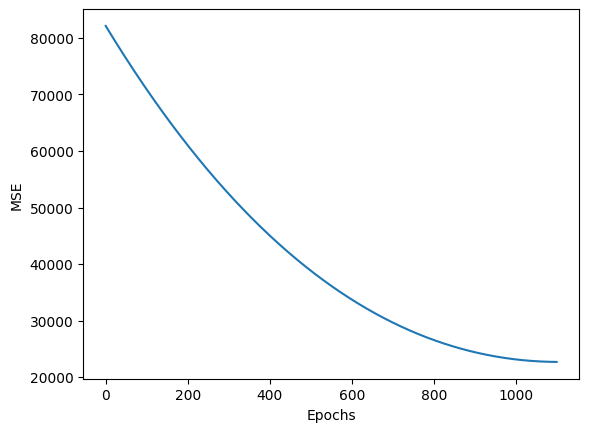


 Mean Squared Error: 22677.893246446034


In [17]:
plt.plot(range(epochs), msefunc)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
print (f"\n Mean Squared Error: {cmse}")